# Predictive Modelling for COVID-19 in Public Health
This project is in response to the COVID-19 pandemic, public health organizations have faced 
immense challenges in predicting the spread of the virus and understanding ke 
factors that influence transmission and patient outcomet
em. The organization requires actionable insight  to
inform policies, anticipate future outbreaks, and improve health resource allocat
pons

Going thruough the following approach
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. experimeant

### 1. Problem Definition
In Statement
> Uisng historical COVID-19 data, to conduct data cleaning, perform exploratory data analysis (EDA), and develop predictive models to forecast COVID-19 trends.
Presenting my findings through visualizations and provide a final report summarizing insights and recommendations for public health responses.

### 2. Data
The original Data came from COVID-19 Open Research Dataset (CORD-19) on 
Kaggle, which includes COVID-19 case counts, demographic data, an 
various health metric https://www.kaggle.com/datasets/allen-institute-for-ai/CORD-19-research-challenge/data

### 3. Evaluation 
Assess model performance with accuracy, precision, recall,
F1-score, or RMSE, as applicable.

## 4.  Feature


**Create Data Dictionary*

Create derived variables, such as daily growth rates, 
mortality ratios, and cases per population to enrich the dataset and strengthe 
model insigh.
*s.
ationes.

In [1]:
#Import all the tools needed
#Regular EDA(Exploratory Data Analysis) and plotting libaries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#for the plot to appear inside the notebook
%matplotlib inline  

#Models from scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Models Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score


# Load Data

In [2]:
df = pd.read_csv("C:/Users/HP/Desktop/full_grouped.csv")
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


In [7]:
df.shape

(35156, 10)

In [8]:
## Data Exploratory
df["WHO Region"].value_counts()

WHO Region
Europe                   10528
Africa                    9024
Americas                  6580
Eastern Mediterranean     4136
Western Pacific           3008
South-East Asia           1880
Name: count, dtype: int64

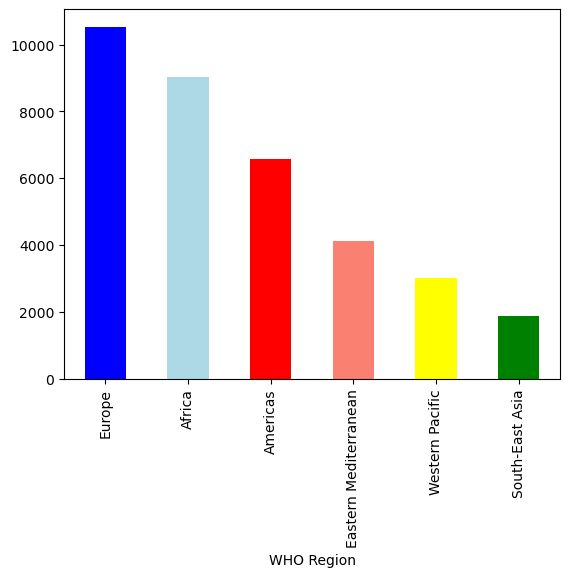

In [11]:
df["WHO Region"].value_counts().plot(kind="bar", color=["blue", "lightblue", "red", "salmon", "yellow", "green"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [13]:
# Are there any missing value?
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [12]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [15]:
df["Country/Region"].value_counts()

Country/Region
Afghanistan    188
Pakistan       188
Nepal          188
Netherlands    188
New Zealand    188
              ... 
Georgia        188
Germany        188
Ghana          188
Greece         188
Zimbabwe       188
Name: count, Length: 187, dtype: int64

In [7]:
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [20]:
Europe = df[["Confirmed", "WHO Region"]]
Europe

,Confirmed,WHO Region
0,0,Eastern Mediterranean
1,0,Europe
2,0,Africa
3,0,Europe
4,0,Africa
...,...,...
35151,10621,Eastern Mediterranean
35152,10,Africa
35153,1691,Eastern Mediterranean
35154,4552,Africa


In [31]:
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


In [5]:
Europe = df[df["WHO Region"] == "Europe"]
Europe

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
7,2020-01-22,Armenia,0,0,0,0,0,0,0,Europe
9,2020-01-22,Austria,0,0,0,0,0,0,0,Europe
10,2020-01-22,Azerbaijan,0,0,0,0,0,0,0,Europe
...,...,...,...,...,...,...,...,...,...,...
35134,2020-07-27,Tajikistan,7235,60,6028,1147,43,1,58,Europe
35141,2020-07-27,Turkey,227019,5630,210469,10920,919,17,982,Europe
35144,2020-07-27,Ukraine,67096,1636,37202,28258,835,11,317,Europe
35146,2020-07-27,United Kingdom,301708,45844,1437,254427,688,7,3,Europe


In [6]:
Europe = Europe.filter(items = ["Date", "Country/Region", "Confirmed", "Deaths", "Recoverd", "WHO Region"])
Europe

,Date,Country/Region,Confirmed,Deaths,WHO Region
1,2020-01-22,Albania,0,0,Europe
3,2020-01-22,Andorra,0,0,Europe
7,2020-01-22,Armenia,0,0,Europe
9,2020-01-22,Austria,0,0,Europe
10,2020-01-22,Azerbaijan,0,0,Europe
...,...,...,...,...,...
35134,2020-07-27,Tajikistan,7235,60,Europe
35141,2020-07-27,Turkey,227019,5630,Europe
35144,2020-07-27,Ukraine,67096,1636,Europe
35146,2020-07-27,United Kingdom,301708,45844,Europe


<Axes: >

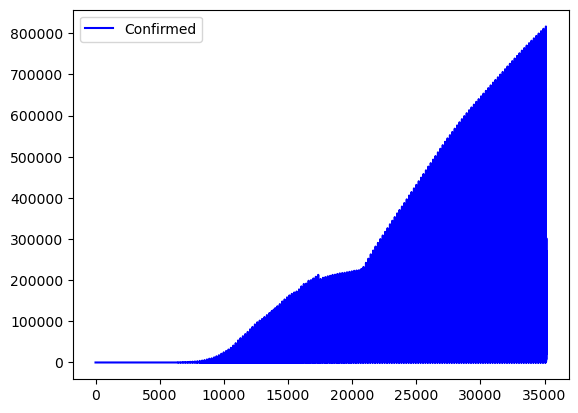

In [48]:
Europe.filter(items = ["Date", "Confirmed"]).plot(kind="line", color=["blue"])

In [13]:
import datetime as dt
Europe["Date"] = pd.to_datetime(Europe["Date"])
Europe_Month = Europe["Date"].dt.year
Europe_Month

1        2020
3        2020
7        2020
9        2020
10       2020
         ... 
35134    2020
35141    2020
35144    2020
35146    2020
35148    2020
Name: Date, Length: 10528, dtype: int32

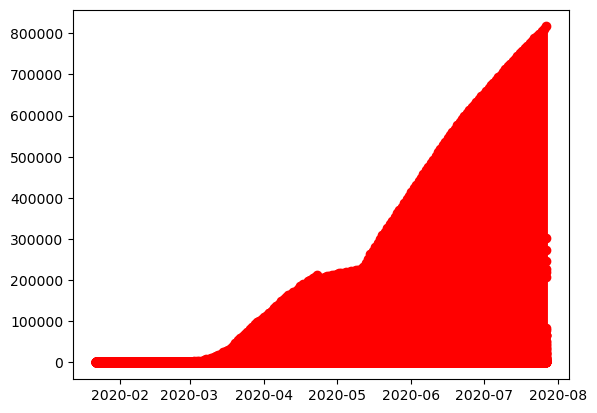

In [21]:
plt.plot(Europe["Date"], Europe["Confirmed"], color="red", marker="o")


In [16]:

Europe["Date"] = pd.to_datetime(Europe["Date"])
Europe["Month"] = Europe["Date"].dt.month
Europe["Month-str"] = Europe["Date"].dt.strftime("%b")
print(Europe)

            Date  Country/Region  Confirmed  Deaths WHO Region  Month  \
1     2020-01-22         Albania          0       0     Europe      1   
3     2020-01-22         Andorra          0       0     Europe      1   
7     2020-01-22         Armenia          0       0     Europe      1   
9     2020-01-22         Austria          0       0     Europe      1   
10    2020-01-22      Azerbaijan          0       0     Europe      1   
...          ...             ...        ...     ...        ...    ...   
35134 2020-07-27      Tajikistan       7235      60     Europe      7   
35141 2020-07-27          Turkey     227019    5630     Europe      7   
35144 2020-07-27         Ukraine      67096    1636     Europe      7   
35146 2020-07-27  United Kingdom     301708   45844     Europe      7   
35148 2020-07-27      Uzbekistan      21209     121     Europe      7   

      Month-str  
1           Jan  
3           Jan  
7           Jan  
9           Jan  
10          Jan  
...         ...

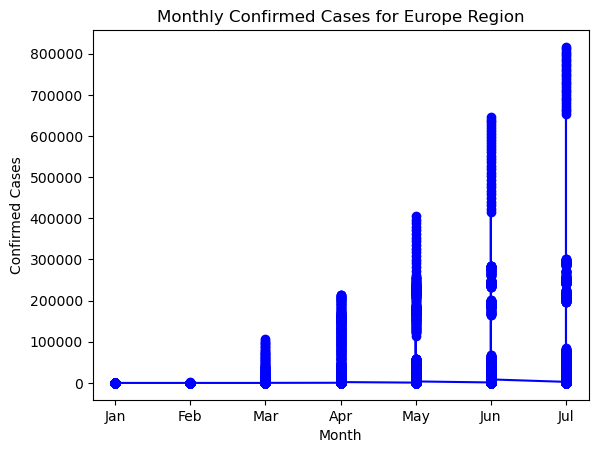

In [29]:
plt.plot(Europe["Month-str"], Europe["Confirmed"], color="blue", marker="o")
plt.title("Monthly Confirmed Cases for Europe Region")
plt.xlabel("Month")
plt.ylabel("Confirmed Cases")
plt.show()

In [3]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df["Month-str"] = df["Date"].dt.strftime("%b")
print(df)

            Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
0     2020-01-22         Afghanistan          0       0          0       0   
1     2020-01-22             Albania          0       0          0       0   
2     2020-01-22             Algeria          0       0          0       0   
3     2020-01-22             Andorra          0       0          0       0   
4     2020-01-22              Angola          0       0          0       0   
...          ...                 ...        ...     ...        ...     ...   
35151 2020-07-27  West Bank and Gaza      10621      78       3752    6791   
35152 2020-07-27      Western Sahara         10       1          8       1   
35153 2020-07-27               Yemen       1691     483        833     375   
35154 2020-07-27              Zambia       4552     140       2815    1597   
35155 2020-07-27            Zimbabwe       2704      36        542    2126   

       New cases  New deaths  New recovered             WHO Reg

In [4]:
pd.crosstab(df["Month-str"], df["WHO Region"])

WHO Region,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
Month-str,,,,,,
Apr,1440,1050,660,1680,300,480
Feb,1392,1015,638,1624,290,464
Jan,480,350,220,560,100,160
Jul,1296,945,594,1512,270,432
Jun,1440,1050,660,1680,300,480
Mar,1488,1085,682,1736,310,496
May,1488,1085,682,1736,310,496


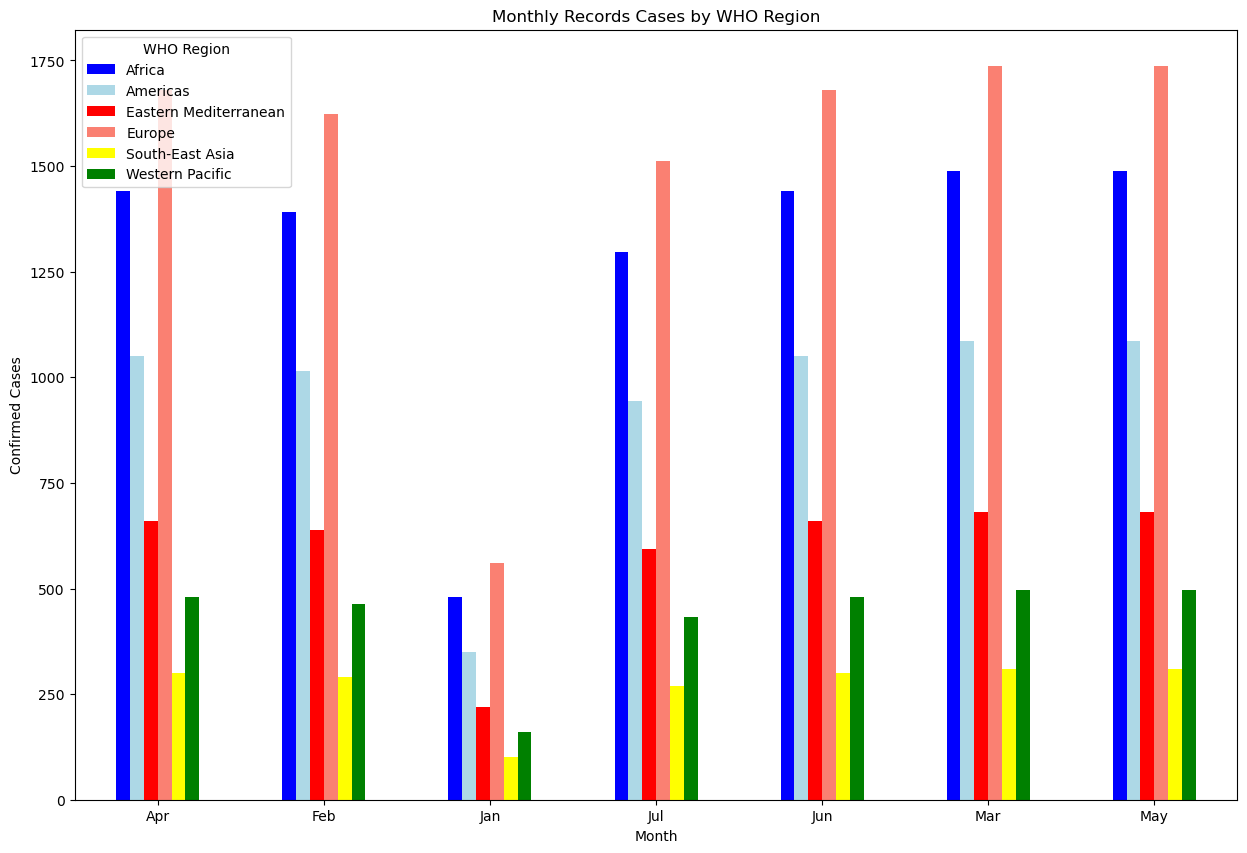

In [53]:
pd.crosstab(df["Month-str"], df["WHO Region"]).plot(kind="bar", figsize= (15, 10),
                                                     color=["blue", "lightblue", "red", "salmon", "yellow", "green"]) 
plt.title("Monthly Records Cases by WHO Region")
plt.xlabel("Month")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=0)
plt.show()

<Axes: >

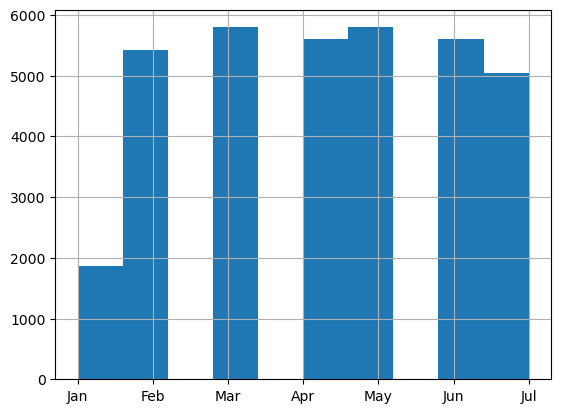

In [55]:
df["Month-str"].hist()

In [ ]:
pd.crosstab(df["Confirmed"], df["WHO Region"])

In [ ]:
pd.crosstab(df["Confirmed"], df["WHO Region"]).plot(kind="bar", figsize= (15, 10),
                                                     color=["blue", "lightblue", "red", "salmon", "yellow", "green"]) 
plt.title("Monthly Records Cases by WHO Region")
plt.xlabel("Month")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Europe = df[df["WHO Region"] == "Europe"
df.plot(x="Month-str", y=["Confirmed", "WHO Region"], kind="bar")
plt.show()

In [ ]:
sns.countplot(x="WHO Region" , hue="Confirmed", data=df)

In [ ]:
Europe = df[["Confirmed", "WHO Region"]]
Europe